---
> #  ML  Project  On  *Air Quality Dataset*
---





# Harsh Kumar Jha 02219011921

## INTRODUCTION

In [1]:
# MOUNTING GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORTING REQUIRED LIBRARIES FOR PERFORMING REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# # URL of dataset ZIP File
# data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# # EXTRACTING FILE FROM ZIP AND SAVING TO DRIVE
# import requests
# import zipfile
# import io

# # Send a GET request to the URL and download the ZIP file
# response = requests.get(data_url)
# zip_data = response.content

# # Extract the contents of the ZIP file
# with zipfile.ZipFile(io.BytesIO(zip_data)) as zip_file:
#     extract_dir = "/content/drive/MyDrive/Ml Project AirQuality/"
#     zip_file.extractall(extract_dir)

# print("Extraction completed.\nFiles saved in >> ", extract_dir)


In [4]:
# LOAD THE DATASET
df = pd.read_csv('/content/drive/MyDrive/AirQualityUCI.csv', sep=';', decimal=',')

# DATA BASIC INSIGHTS

In [5]:
print(df.shape,'\n')

(9471, 17) 



In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0000,-200.0000,-200.0000,1189.000
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0000,942.0000,1255.0000,2523.000


In [7]:
print(df.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [8]:
print(df.tail())

     Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  \
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   

      Unnamed: 15  Unnamed: 16  
9466          NaN          NaN  
9467          

In [9]:
print(df.columns)
print(len(df.columns))

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
17


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


# DATA PREPROCESSING

In [11]:
# REMOVING NOT REQUIRED ATTRIBUTES
unnamed_attr  =['Unnamed: 15', 'Unnamed: 16']
df.drop(unnamed_attr,axis = 1,inplace = True)
df.shape

(9471, 15)

In [12]:
# CONCATENATING DATE AND TIME AND MAKING A NEW ATTIBUTE
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H.%M.%S')

df = df.drop(columns=['Date', 'Time'])
# REPLACE MISSING VALUES WHICH ARE TAGGED WITH -200 WITH NaN
df = df.replace(-200.0, np.nan)

# DROP ROWS WITH MISSING TARGET VALUES
df = df.dropna(subset=['CO(GT)'])

In [13]:
df.isna().sum()

CO(GT)              0
PT08.S1(CO)       330
NMHC(GT)         6784
C6H6(GT)          330
PT08.S2(NMHC)     330
NOx(GT)           413
PT08.S3(NOx)      330
NO2(GT)           416
PT08.S4(NO2)      330
PT08.S5(O3)       330
T                 330
RH                330
AH                330
Datetime            0
dtype: int64

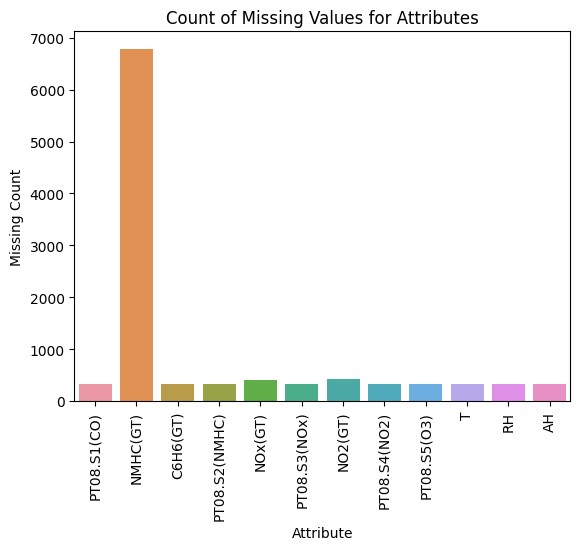

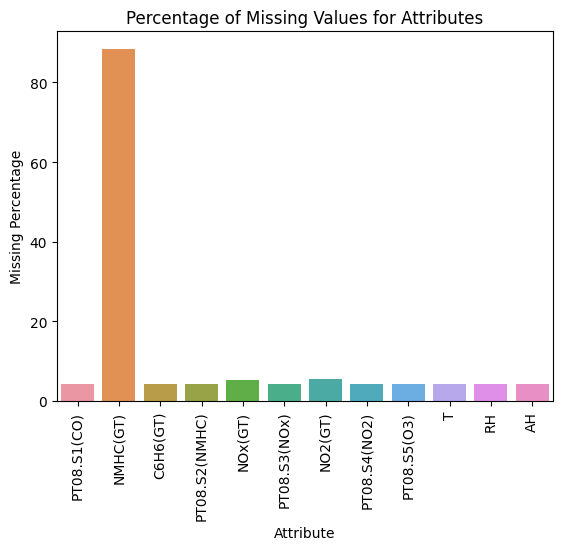

In [14]:
#

# SELECTING ATTRIBUTES HAVING NaN VALUES
attributes=['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)',
      'NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)',
      'PT08.S5(O3)','T','RH','AH']

# CALCULATING THE COUNT OF MISSING VALUES FOR EACH ATTRIBUTE
missing_count = df[attributes].isnull().sum()

# CALCULATING THE PERCENTAGE OF MISSING VALUES FOR EACH ATTRIBUTE
missing_percentage = (missing_count / len(df)) * 100

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})

# Plot the bar chart
# plt.figure(figsize=(5, 3))
sns.barplot(x=missing_data.index, y='Missing Count', data=missing_data)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Missing Count')
plt.title('Count of Missing Values for Attributes')
plt.show()

# Plot the bar chart for missing percentage
# plt.figure(figsize=(5, 3))
sns.barplot(x=missing_data.index, y='Missing Percentage', data=missing_data)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values for Attributes')
plt.show()

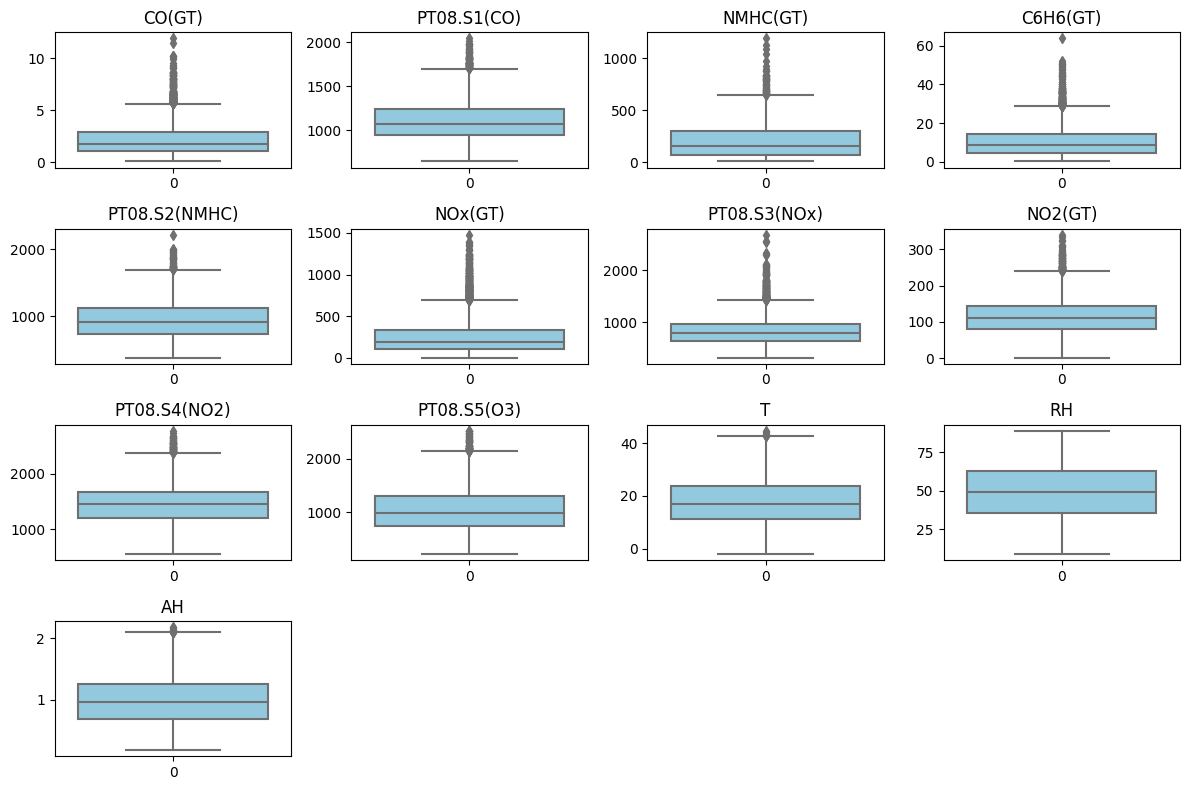

In [15]:
# BOX PLOT FOR OUTLIER DETECTION IN EACH ATTRIBUTE
all_attr = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
              'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
              'T', 'RH', 'AH']

plt.figure(figsize=(12, 8))
for i, attribute in enumerate(all_attr):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df[attribute], color='skyblue')
    plt.title(attribute)
    plt.tight_layout()
plt.show()

## DATA PREPROCESSING

#### HANDLING MISSING VALUES

In [16]:
from sklearn.impute import SimpleImputer
# HANDLING MISSING VALUES
def handle_missing_values(df):
    imputer = SimpleImputer(strategy='mean')
    for column in df.columns:
        df[column] = imputer.fit_transform(df[[column]])
    return df

# Usage
df = handle_missing_values(df)

# Check missing values
print(df.isna().sum())


CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Datetime         0
dtype: int64


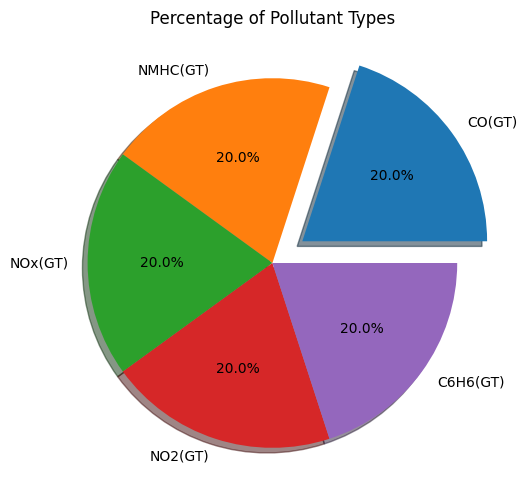

In [17]:
# PIE CHART
pollutant_counts = df[['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']].count()
# EXPLODING THE CO(GT) FOR VISUALISATION
explode = [0.2 if pollutant == 'CO(GT)' else 0 for pollutant in pollutant_counts.index]
plt.figure(figsize=(8, 6))
plt.pie(pollutant_counts, labels=pollutant_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Pollutant Types')
plt.show()

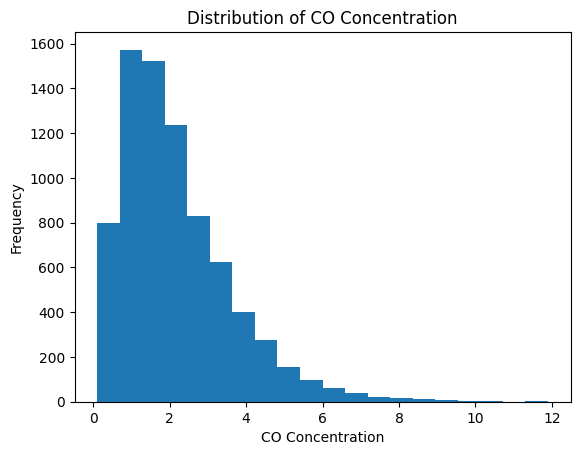

In [18]:
# PLOTTING HISTOGRAM BETWEEN CARBON MONOXIDE AND ITS FREQUENCY
plt.hist(df['CO(GT)'], bins=20)
plt.xlabel('CO Concentration')
plt.ylabel('Frequency')
plt.title('Distribution of CO Concentration')
plt.show()

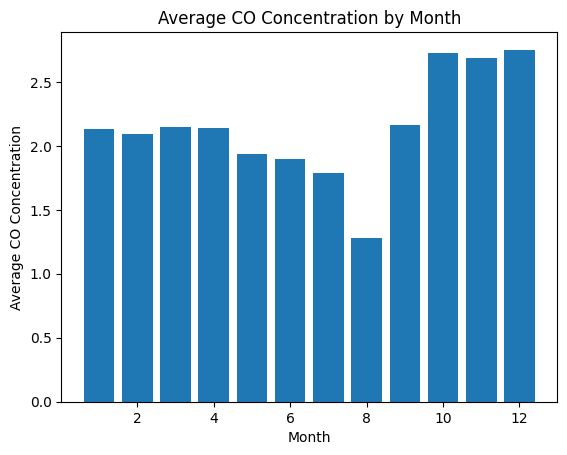

In [19]:
# PLOTTING BAR GRAPH BETWEEN AVERAGE CARBON MONOXIDE CONC. BY MONTH
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Converting 'Datetime' column to datetime data type
monthly_avg_co = df.groupby(df['Datetime'].dt.month)['CO(GT)'].mean()

plt.bar(monthly_avg_co.index, monthly_avg_co)
plt.xlabel('Month')
plt.ylabel('Average CO Concentration')
plt.title('Average CO Concentration by Month')
plt.show()

<ipython-input-20-0cd4678311c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


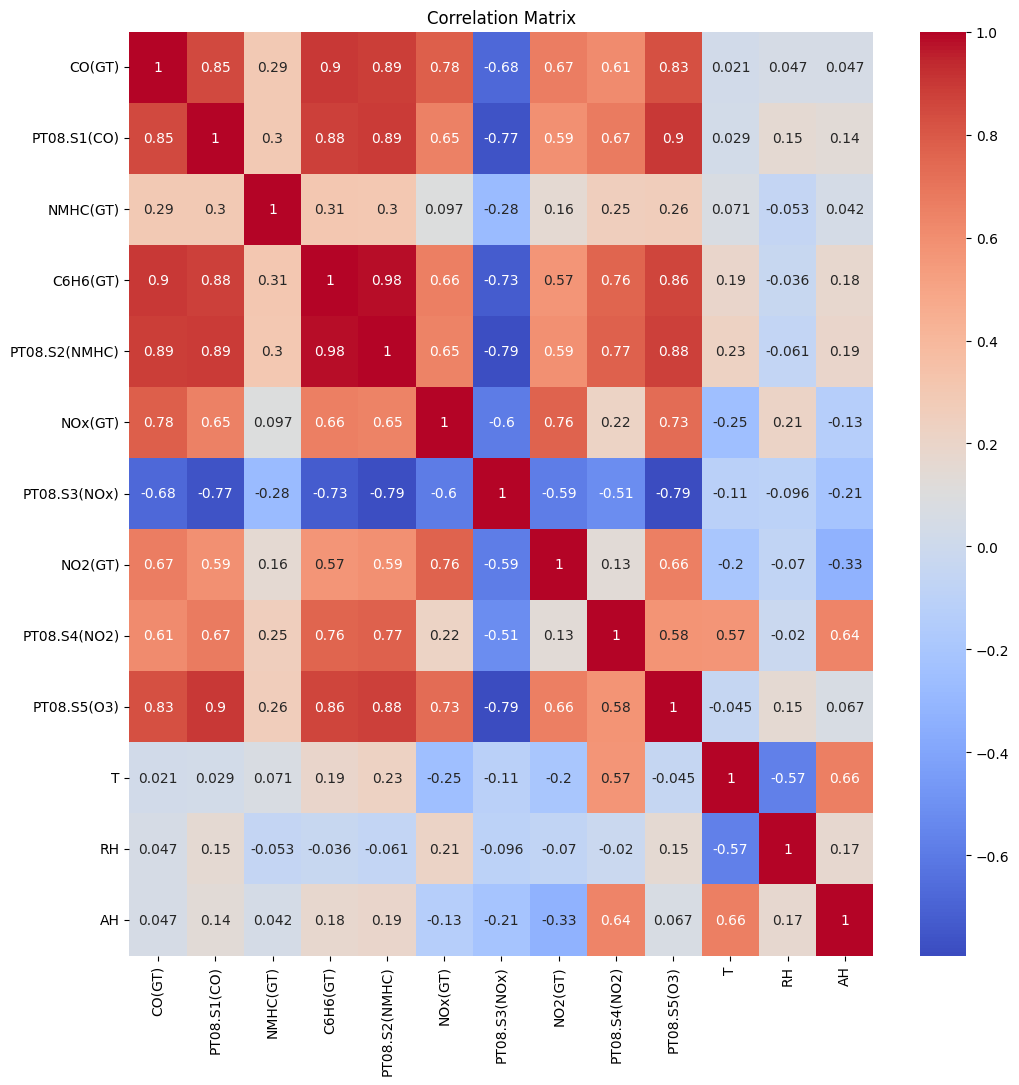

In [20]:
# PLOTTING CORRELATIONAL MATRIX
plt.figure(figsize=(12, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### SPLITTING INTO TRAINING AND TESTING DATA

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CO(GT)'])
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_test.columns)


Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Datetime'],
      dtype='object')


In [23]:
# SCALING TO SETTING ALL ATTRIBUTES UNITS SIMILAR
from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaler.fit_transform(X_train)
# scaler.fit_transform(X_test)

# print(X_train.head(10))

numeric_columns =  ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'] # List of columns containing numeric data
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [24]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### APPLYING REGRESSION MODELS

In [25]:
# IMPORTING REQUIRED LIBRARIES
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# !pip install catboost
from catboost import CatBoostRegressor

# DEFINE THE REGRESSOR MODELS
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    Lasso(alpha=0.1),  # alpha is a positive float value that determines the amount of regularization
    Ridge(),           # Higher values of alpha increase the regularization strength, leading to more coefficients being pushed towards zero
    ElasticNet(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=False), # verbose outputs the the training progress information during training process
]

# TRAIN AND EVALUATE THE REGRESSOR MODELS
results = {}

for regressor in regressors:
    model = regressor
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    results[type(regressor).__name__] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2SCORE': r2}

# PRINTING THE RESULTING METRIC VALUES PER MODEL
for model_name, metrics in results.items():
    print(f'\n{model_name}:\n')
    print(f'MSE: {metrics["MSE"]:.2f}')
    print(f'MAE: {metrics["MAE"]:.2f}')
    print(f'RMSE: {metrics["RMSE"]:.2f}')
    print(f'R2SCORE: {metrics["R2SCORE"]:.2f}')
    print('-----------------------------')


LinearRegression:

MSE: 0.23
MAE: 0.31
RMSE: 0.48
R2SCORE: 0.89
-----------------------------

DecisionTreeRegressor:

MSE: 0.27
MAE: 0.34
RMSE: 0.52
R2SCORE: 0.87
-----------------------------

RandomForestRegressor:

MSE: 0.15
MAE: 0.24
RMSE: 0.39
R2SCORE: 0.93
-----------------------------

SVR:

MSE: 0.31
MAE: 0.34
RMSE: 0.56
R2SCORE: 0.85
-----------------------------

Lasso:

MSE: 0.28
MAE: 0.35
RMSE: 0.53
R2SCORE: 0.87
-----------------------------

Ridge:

MSE: 0.23
MAE: 0.31
RMSE: 0.48
R2SCORE: 0.89
-----------------------------

ElasticNet:

MSE: 0.94
MAE: 0.71
RMSE: 0.97
R2SCORE: 0.55
-----------------------------

KNeighborsRegressor:

MSE: 0.18
MAE: 0.27
RMSE: 0.43
R2SCORE: 0.91
-----------------------------

XGBRegressor:

MSE: 0.15
MAE: 0.26
RMSE: 0.39
R2SCORE: 0.93
-----------------------------

LGBMRegressor:

MSE: 0.16
MAE: 0.25
RMSE: 0.40
R2SCORE: 0.92
-----------------------------

CatBoostRegressor:

MSE: 0.14
MAE: 0.24
RMSE: 0.37
R2SCORE: 0.93
-------------------

In [26]:
# DISPLAYING THE OUTPUT ABOVE IN A TABULAR FORMAT
metrics_table = pd.DataFrame(results).T
print(metrics_table)

                            MSE       MAE      RMSE   R2SCORE
LinearRegression       0.227438  0.305913  0.476905  0.890806
DecisionTreeRegressor  0.266516  0.335529  0.516252  0.872044
RandomForestRegressor  0.150739  0.244250  0.388251  0.927629
SVR                    0.310518  0.344071  0.557242  0.850919
Lasso                  0.279227  0.345127  0.528420  0.865942
Ridge                  0.227455  0.305934  0.476922  0.890798
ElasticNet             0.939387  0.713057  0.969220  0.548995
KNeighborsRegressor    0.180696  0.273368  0.425083  0.913247
XGBRegressor           0.153679  0.256692  0.392019  0.926218
LGBMRegressor          0.156449  0.252028  0.395536  0.924888
CatBoostRegressor      0.137004  0.238401  0.370141  0.934224


#### PLOTTING DIFFERENT PLOTS TO VISUALIZE THE RESULTS

In [27]:
# Create and fit a LinearRegression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# PRINTING THE COEFFICIENTS ALONG WITH THEIR RESPECTIVE ATTRIBUTES
print("Coefficients:\n")
for feature, coefficient in zip(X.columns, regressor.coef_):
    print(f"{feature}: {coefficient}")

# Print the intercept
print("\n")
print("Intercept:", regressor.intercept_)
print("\n")

Coefficients:

PT08.S1(CO): 0.35939930774999107
NMHC(GT): 0.0009937999905714548
C6H6(GT): 0.7203683713495175
PT08.S2(NMHC): 0.039440834032755605
NOx(GT): 0.5585559374664318
PT08.S3(NOx): 0.05446702536721197
NO2(GT): 0.12880645229819165
PT08.S4(NO2): 0.4935664199907938
PT08.S5(O3): -0.2658613470839768
T: -0.28153275363895336
RH: -0.1841454457310959
AH: -0.04708681797565513


Intercept: 1.9064274366170197




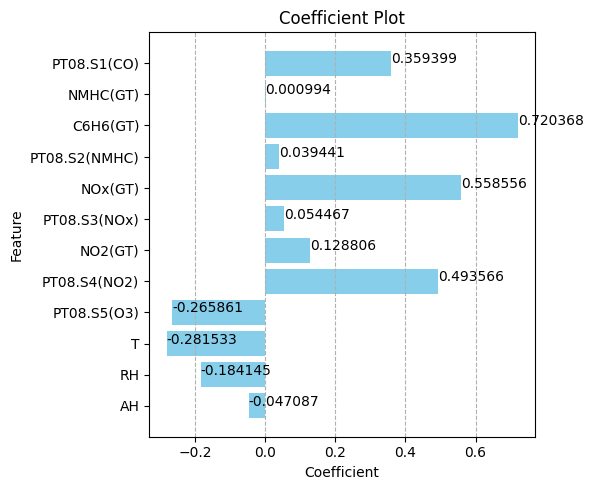

In [28]:
# Get the feature names and coefficients
features = X.columns[:12]  # Consider only the first 12 features
coefficients = regressor.coef_

# Reverse the order of features and coefficients to get actual order
features = features[::-1]
coefficients = coefficients[::-1]

# Plot the coefficients
plt.figure(figsize=(6, 5))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficient Plot')

# Add data labels to the bars
for i, (feature, coefficient) in enumerate(zip(features, coefficients)):
    plt.text(coefficient, i, f'{coefficient:.6f}', fontsize=10, color='black')

# Customize the plot aesthetics
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Show the plot
plt.show()

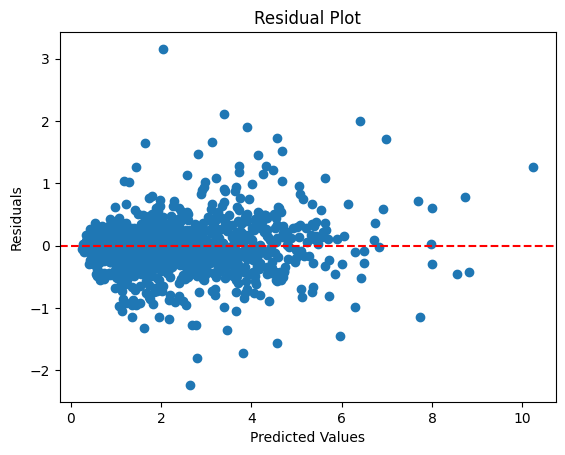

In [29]:
# RESIDUAL PLOT
residual = (y_test - y_pred)
# SCATTER PLOTTING
plt.scatter(y_pred, residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

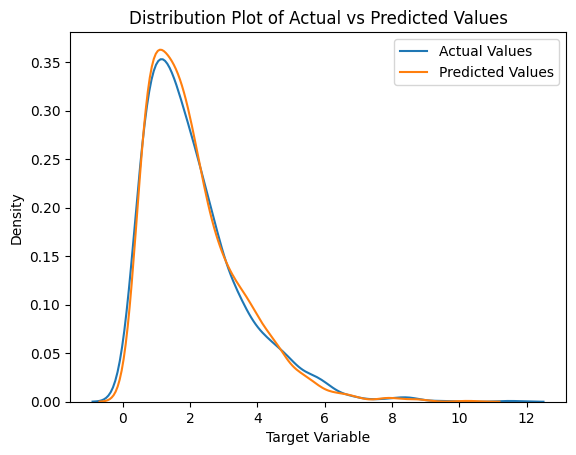

In [30]:
# DISTRIBUTION PLOT
# FOR ACTUAL VS PREDICTED COMPARISON
sns.kdeplot(y_test, label='Actual Values')
sns.kdeplot(y_pred, label='Predicted Values')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('Distribution Plot of Actual vs Predicted Values')
plt.legend()
plt.show()

### PLOTTING PERFORMANCE METRICS

In [31]:
mse = []      # Initialising List for storing Mean Squared Error Values
mae = []      # Initialising List for storing Mean Absolute Error Values
r2score = []  # Initialising List for storing r2 score
rmse=[]
# Rounding off MSE, MAE & r2score by 2 digits for easy plotting
for model_name, metrics in results.items():
    mse.append(round(metrics['MSE'], 2))
    mae.append(round(metrics['MAE'], 2))
    r2score.append(round(metrics['R2SCORE'], 2))
    rmse.append(round(metrics['RMSE'], 2))

# Printing to see lists' values
print('MSE List:', mse)
print('MAE List:', mae)
print('RMSE List:', rmse)
print('R2SCORE list:', r2score)

MSE List: [0.23, 0.27, 0.15, 0.31, 0.28, 0.23, 0.94, 0.18, 0.15, 0.16, 0.14]
MAE List: [0.31, 0.34, 0.24, 0.34, 0.35, 0.31, 0.71, 0.27, 0.26, 0.25, 0.24]
RMSE List: [0.48, 0.52, 0.39, 0.56, 0.53, 0.48, 0.97, 0.43, 0.39, 0.4, 0.37]
R2SCORE list: [0.89, 0.87, 0.93, 0.85, 0.87, 0.89, 0.55, 0.91, 0.93, 0.92, 0.93]


In [32]:
# CREATING AN NUMPY ARRAY OF LENGTH 11
# WHICH ACTS AS X AXIS FOR 11 DIFFERENT MODELS APPLIED
arr=np.arange(11)

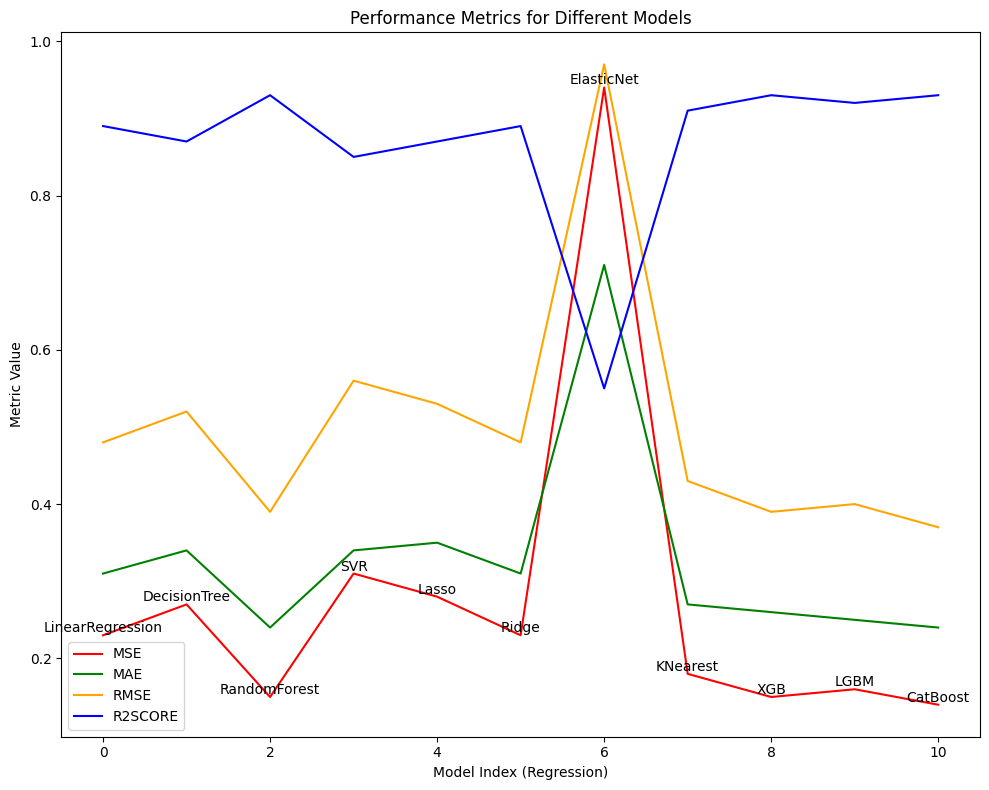

In [33]:
models = [
    'LinearRegression',
    'DecisionTree',
    'RandomForest',
    'SVR',
    'Lasso',
    'Ridge',
    'ElasticNet',
    'KNearest',
    'XGB',
    'LGBM',
    'CatBoost'
]

plt.figure(figsize=(10, 8))

# PLOT MSE VALUES
plt.plot(arr, mse, color='red', label='MSE')

# PLOT MAE VALUES
plt.plot(arr, mae, color='green', label='MAE')

# PLOT RMSE VALUES
plt.plot(arr, rmse, color='orange', label='RMSE')

# PLOT R2SCORE VALUES
plt.plot(arr, r2score, color='blue', label='R2SCORE')

plt.xlabel('Model Index (Regression)')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Models', fontsize=12)
plt.legend()
plt.tight_layout()
# ADDING MODEL NAMES AS ANNOTATIONS
for i, model in enumerate(models):
    plt.text(arr[i], mse[i], model, ha='center', va='bottom')
plt.show()

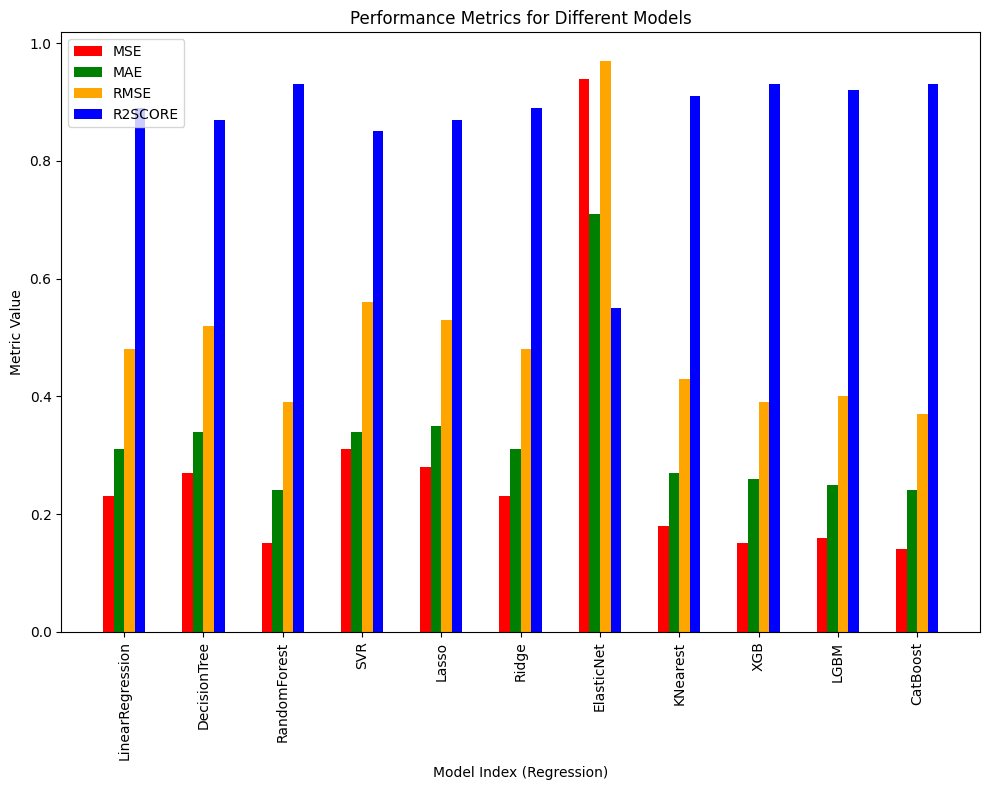

In [34]:
# LIST OF METRICS, THEIR VALUES, AND CORRESPONDING COLORS
metrics = [
    ('MSE', mse, 'red'),
    ('MAE', mae, 'green'),
    ('RMSE', rmse, 'orange'),
    ('R2SCORE', r2score, 'blue')
]

# SET THE WIDTH OF THE BARS
bar_width = 0.2

# CALCULATE THE X-AXIS POSITIONS FOR EACH GROUP OF BARS
model_position = np.arange(len(models)) * 1.5

# CREATE THE FIGURE
plt.figure(figsize=(10, 8))

# ITERATE OVER EACH METRIC AND PLOT THE BARS
for i, (metric, values, color) in enumerate(metrics):
    # CALCULATE THE X-AXIS POSITIONS FOR THE BARS WITHIN EACH GROUP
    bar_position = model_position + i * bar_width
    plt.bar(bar_position, values, width=bar_width, color=color, label=metric)

plt.xlabel('Model Index (Regression)')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Models', fontsize=12)
plt.xticks(model_position + bar_width * 1.5, models, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
